# **Credit Card Fraud Detection**

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('creditcard.csv')


In [4]:
# Data preprocessing
X = data.drop('Class', axis=1)  # Features
y = data['Class']              # Target variable


In [5]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
data_clean = data.dropna(subset=['Class'])
X_clean = data_clean.drop('Class', axis=1)
y_clean = data_clean['Class']
scaler = StandardScaler()
X_scaled_clean = scaler.fit_transform(X_clean)
X_resampled, y_resampled = smote.fit_resample(X_scaled_clean, y_clean)

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [11]:
# Model training with Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [12]:
# Model training with Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [14]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
evaluate_model(log_reg, X_test, y_test)

Logistic Regression Performance:
Confusion Matrix:
[[612   1]
 [  0 577]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       613
         1.0       1.00      1.00      1.00       577

    accuracy                           1.00      1190
   macro avg       1.00      1.00      1.00      1190
weighted avg       1.00      1.00      1.00      1190



In [15]:
# Evaluate Random Forest
print("Random Forest Performance:")
evaluate_model(rf_clf, X_test, y_test)

Random Forest Performance:
Confusion Matrix:
[[613   0]
 [  0 577]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       613
         1.0       1.00      1.00      1.00       577

    accuracy                           1.00      1190
   macro avg       1.00      1.00      1.00      1190
weighted avg       1.00      1.00      1.00      1190



In [16]:
pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn


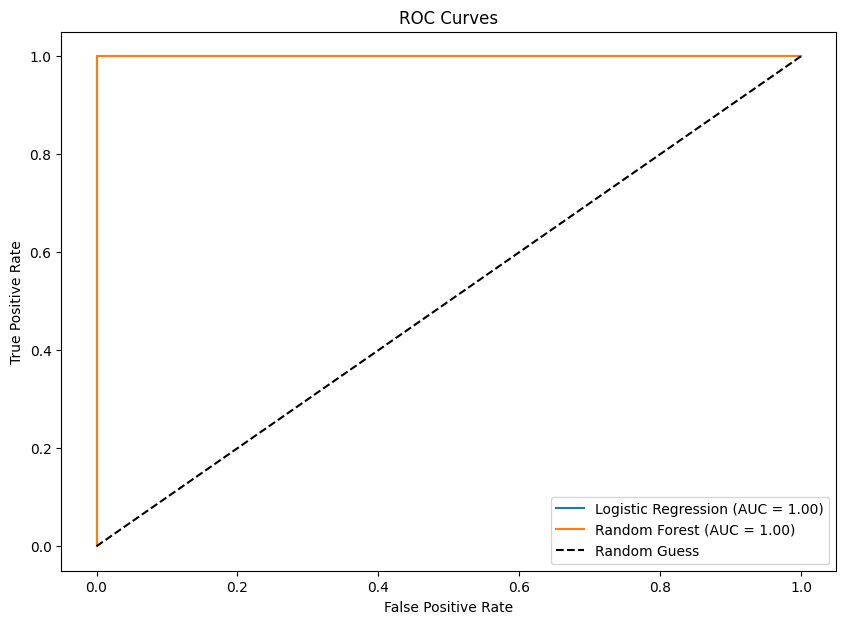

In [24]:
# ROC Curve Comparison
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 7))
    for name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

plot_roc_curve({"Logistic Regression": log_reg, "Random Forest": rf_clf}, X_test, y_test)


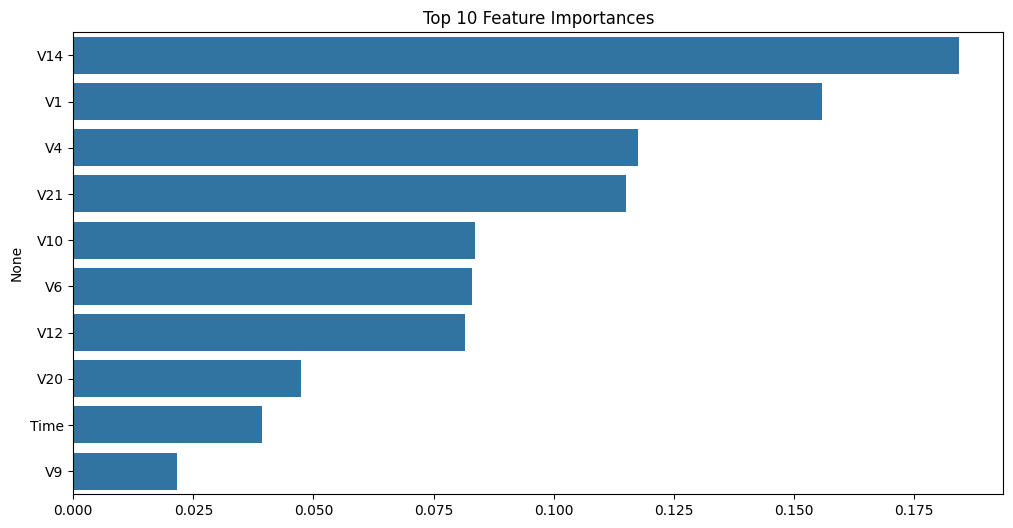

In [30]:
# Feature Importance
importances = rf_clf.feature_importances_
feature_names = data.drop('Class', axis=1).columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
import seaborn as sns
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances")
plt.show()